Welcome to JupyROOT 6.14/04
sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp sp 
## spill break ##
[4.2, 8.0, 5.4, 6.8, 6.0, 6.4, 74.4, 8.0, 0.0, 0.0]


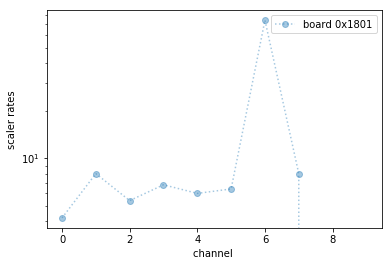


## spill break ##
[116636.6, 129282.4, 135486.8, 158101.4, 111985.0, 100685.6, 135739.0, 132879.2, 181778.4, 201324.8]


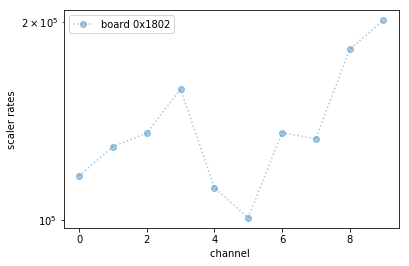

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from fst import *
import tdc_daq as td
number_of_TDC_channels = 10
tdc_channels = list(range(0, number_of_TDC_channels))

measure_board_list =  [  "0x1801","0x1802" ]
spillbreak_rate_scintillator = 3000


for b in range(0,len(measure_board_list)):


    name = measure_board_list[b]
    wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
    #wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
    scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,5) 
    print(scaler_rates)
    plt.errorbar(range(0,len(scaler_rates)),scaler_rates, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "board {:s}".format(name))
    plt.xlabel("channel ")
    plt.ylabel("scaler rates")  
    plt.legend()
    plt.yscale('log')
    plt.show()

set TDC spike rejection  0
br 
## spill start ##
[352630.4, 366778.0, 404578.8, 415656.2, 285115.6, 387987.4, 1224283.4, 396803.0, 0.2, 0.2]
set TDC spike rejection  1

## spill start ##
[338067.2, 381795.8, 417800.2, 432103.2, 327037.0, 395089.2, 1069684.8, 374956.4, 0.2, 1.0]
set TDC spike rejection  2

## spill start ##
[237614.4, 292897.0, 347106.6, 349760.0, 310930.0, 320026.6, 724516.0, 269305.6, 0.4, 2.0]
set TDC spike rejection  3

## spill start ##
[129080.0, 197717.0, 221433.2, 249656.2, 236014.8, 228675.8, 400502.8, 150617.0, 0.2, 0.8]
set TDC spike rejection  4

## spill start ##
[60569.8, 110282.8, 141414.6, 174677.0, 167848.4, 140953.8, 145649.6, 60610.2, 0.2, 0.8]
set TDC spike rejection  5

## spill start ##
[54728.8, 91587.0, 130650.4, 159050.4, 155967.2, 126934.8, 95868.4, 53099.4, 0.0, 0.4]
set TDC spike rejection  6

## spill start ##
[29815.2, 50596.0, 73669.0, 90451.6, 89165.6, 72168.8, 51155.2, 29238.4, 0.0, 0.4]
set TDC spike rejection  7

## spill start ##
[5.8

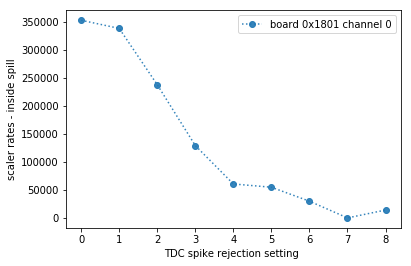

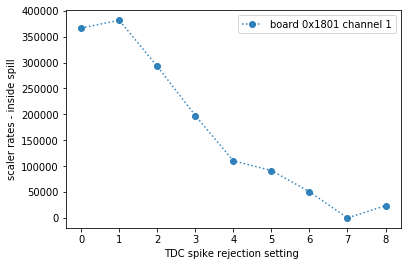

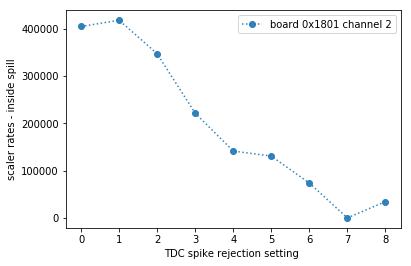

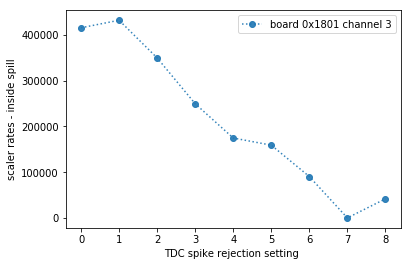

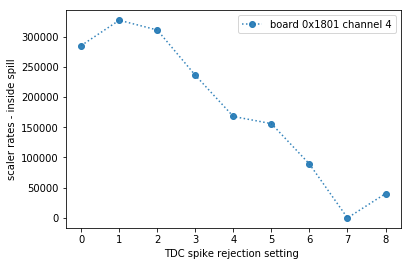

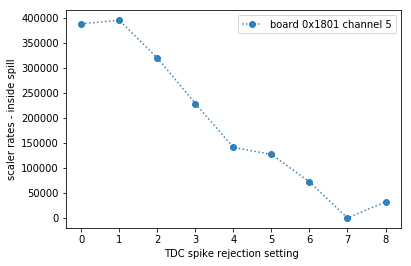

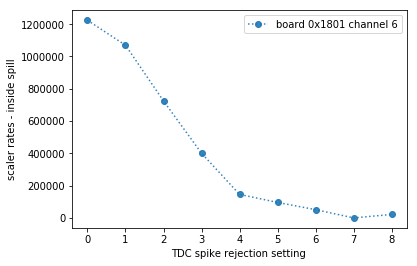

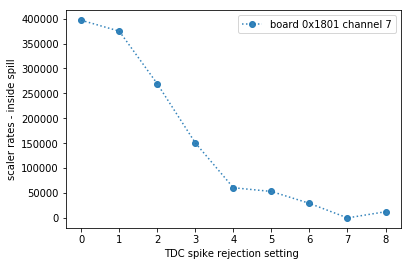

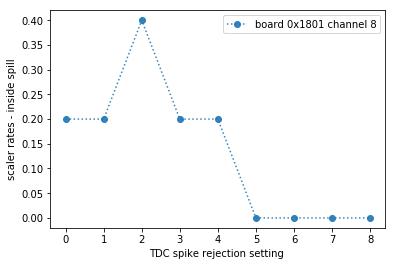

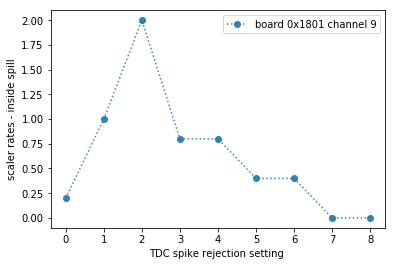

set TDC spike rejection  0

## spill start ##
[189100.4, 231252.2, 269056.6, 306112.6, 255480.4, 208681.8, 204834.4, 177958.8, 214988.0, 224176.0]
set TDC spike rejection  1

## spill start ##
[296743.4, 361784.8, 421514.6, 478173.8, 398192.0, 325622.6, 322080.6, 279447.6, 340496.0, 357366.8]
set TDC spike rejection  2

## spill start ##
[180875.6, 220655.6, 256401.6, 291987.8, 241961.4, 197516.2, 196549.8, 171183.8, 209139.6, 219595.2]
set TDC spike rejection  3

## spill start ##
[180144.6, 218429.6, 253458.8, 287735.6, 238225.4, 195138.4, 195758.4, 171482.6, 210515.4, 221459.2]
set TDC spike rejection  4

## spill start ##
[128761.4, 147552.8, 161975.8, 186396.6, 139596.8, 121386.4, 147763.2, 139216.8, 185310.6, 204316.8]
set TDC spike rejection  5
br br br br br br br br br br br br br br 
## spill start ##
[135402.6, 158235.4, 176765.0, 204242.6, 157520.4, 134782.2, 155818.0, 144030.8, 186713.4, 204570.2]
set TDC spike rejection  6

## spill start ##
[177613.4, 214948.2, 250405.0,

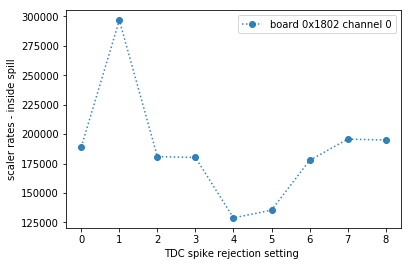

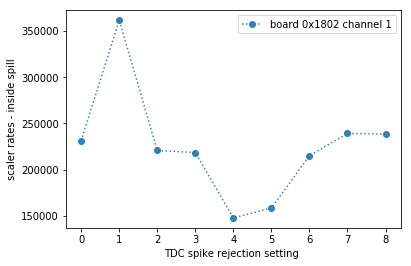

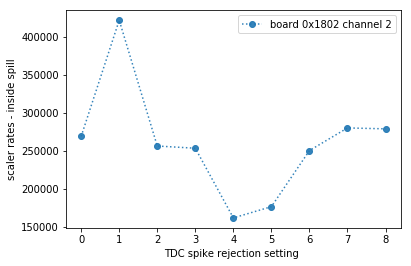

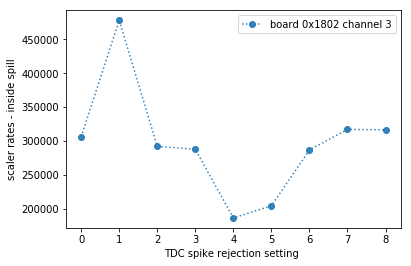

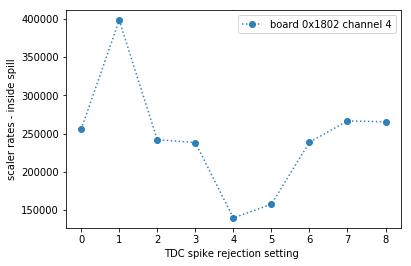

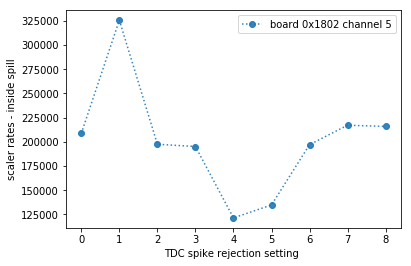

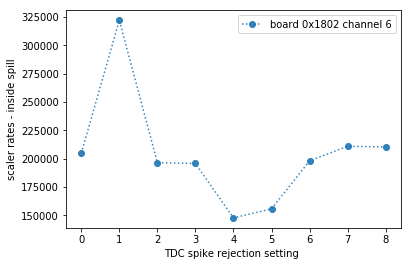

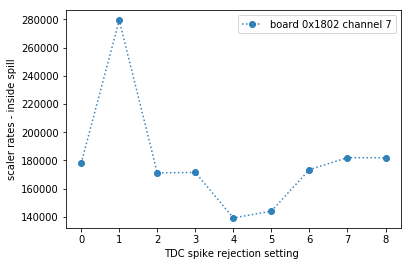

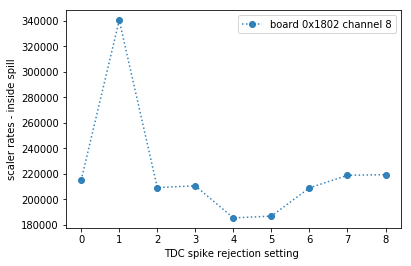

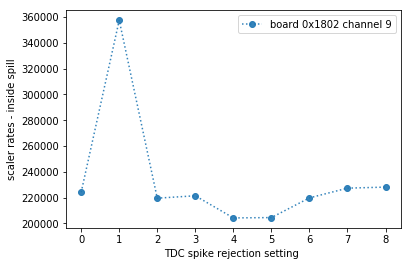

In [2]:

spike_reject_list_TDC = [0,1,2,3,4,5,6,7,8]
#spike_reject_list_TDC = [8,5,2,0]
trend_scan_Nsteps =len(spike_reject_list_TDC)
measure_time=10
# measure_board_list =  [ "0902", "0905"]  
#measure_board_list =  [ "0902"           ]  
measure_board_list =  [  "0x1801","0x1802" ]


from matplotlib import pyplot as plt
%matplotlib inline

from fst import *
from my_utils import *
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import time
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()


for b in range(0,len(measure_board_list)):

    average_scaler_list        =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    average_scaler_list_err    =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    #ptc.init_active_boards(pt_pktime,pt_gain,pt_threshold_default) 
    # get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
    scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

    scaler_list_trend_channel = [ []  for i in range(16)] 
    name = measure_board_list[b]
    for p in range(0,trend_scan_Nsteps):
             #setTDC spike rejection to ~50ns 
            print("set TDC spike rejection ", spike_reject_list_TDC[p])
            os.system("trbcmd loadbit 0x1801 0xd580 0xf0000000 0x{:d}0000000".format(spike_reject_list_TDC[p]))
            #wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
            wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
            #scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,5) 
            print(scaler_rates)            
            #scaler_rates = td.scaler_rate("0x0350",[48,49],1)

            for ch in range(0,len(scaler_rates)):
                    scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
                
#  plt.show()
#  plt.legend()
# scaler_rates = td.scaler_rate_of_board(name,measure_time) 
    for ch in range(0,len(scaler_rates)):
        if scaler_list_trend_channel[ch]:
                plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "board {:s} channel {:d}".format(name,ch))
                plt.xlabel("TDC spike rejection setting ")
                plt.ylabel("scaler rates - inside spill")  
        plt.legend()
        plt.show()

[316533.0, 240376.0]
[295297.0, 222972.0]
[267662.0, 202751.0]
[157702.0, 117883.0]
[14969.0, 8976.0]
[83.0, 80.0]
[87.0, 71.0]
[73.0, 72.0]
[101.0, 72.0]
[108.0, 65.0]
[65734.0, 48781.0]


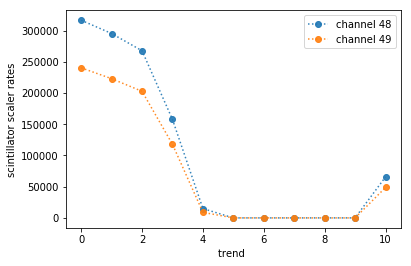

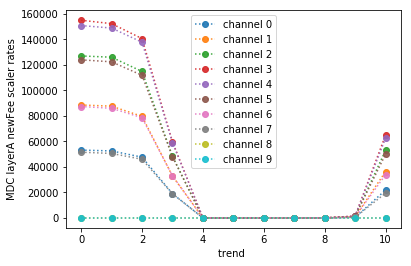

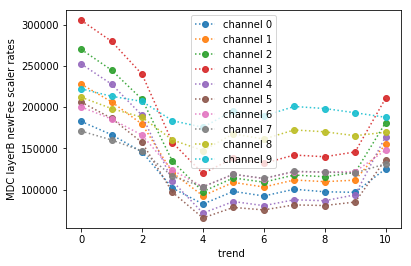

In [3]:
### time trend of sume channels
trend_scan_Nsteps = 11
measure_time=1
# measure_board_list =  [ "0902", "0905"]  
measure_board_list =  [ "0902"]
channellist = [48,49]
tdc_channels = list(range(0, number_of_TDC_channels))

from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()
 
# get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

scaler_list_trend_channel = [ []  for i in range(len(channellist))]
scaler_list_trend_channel_MDCA = [ []  for i in range(len(tdc_channels))]
scaler_list_trend_channel_MDCB = [ []  for i in range(len(tdc_channels))]
for b in range(0,len(measure_board_list)):
 name = measure_board_list[b]
 for p in range(0,trend_scan_Nsteps):
#             scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate("0x0350",channellist,1)
            scaler_rates_MDCA = td.scaler_rate("0x1801",tdc_channels,1)
            scaler_rates_MDCB = td.scaler_rate("0x1802",tdc_channels,1)        
            print(scaler_rates)
 
            for ch in range(0,len(scaler_rates)):
                scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
            for ch in range(0,len(scaler_rates_MDCA)):
                scaler_list_trend_channel_MDCA[ch] += [ scaler_rates_MDCA[ch] ]            
            for ch in range(0,len(scaler_rates_MDCB)):
                scaler_list_trend_channel_MDCB[ch] += [ scaler_rates_MDCB[ch] ]                 
####################


for ch in range(0,len(scaler_rates)):
                if scaler_list_trend_channel[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(channellist[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("scintillator scaler rates")  
plt.legend()
plt.show()


for ch in range(0,len(scaler_rates_MDCA)):
                if scaler_list_trend_channel_MDCA[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel_MDCA[ch])),scaler_list_trend_channel_MDCA[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(tdc_channels[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("MDC layerA newFee scaler rates")  
plt.legend()
plt.show()

for ch in range(0,len(scaler_rates_MDCB)):
                if scaler_list_trend_channel_MDCB[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel_MDCB[ch])),scaler_list_trend_channel_MDCB[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(tdc_channels[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("MDC layerB newFee scaler rates")  
plt.legend()
plt.show()